# 默认代码

In [1]:
# 抑制警告
import warnings
warnings.filterwarnings('ignore')


# 打印 ndarray & DataFrame 更加漂亮
from IPython.display import display

In [2]:
import numpy as np

In [3]:
import pandas as pd

# 版本 + 位置 + 说明文档
print(pd.__version__)
print(pd.__file__)
pd?

1.4.2
D:\Soft\Installer\Anaconda3\envs\MathBert\Lib\site-packages\pandas\__init__.py


# Index
>- Series 、DataFrame 的行 & 列索引

## 创建
>- pd.Index(List , dtype = '数据类型')

In [4]:
idx = pd.Index([1 , 2 , 3] , dtype = int)
print(type(idx))
idx

<class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([1, 2, 3], dtype='int64')

In [5]:
idx = pd.Index([1 , 2 , 3] , dtype = float)
print(type(idx))
idx

<class 'pandas.core.indexes.numeric.Float64Index'>


Float64Index([1.0, 2.0, 3.0], dtype='float64')

In [6]:
idx = pd.Index([1 , 2 , 3] , dtype = str)
print(type(idx))
idx

<class 'pandas.core.indexes.base.Index'>


Index(['1', '2', '3'], dtype='object')

In [7]:
idx = pd.Index([1 , 2.0 , '3'])
print(type(idx))
idx

<class 'pandas.core.indexes.base.Index'>


Index([1, 2.0, '3'], dtype='object')

## 切片 & 属性
>- 切片同 List
>- 属性同 ndarray

In [8]:
idx = pd.Index([1 , 2 , 3 , 4 , 5])
idx

Int64Index([1, 2, 3, 4, 5], dtype='int64')

In [9]:
# 切片同 List

print(idx[0])
print(idx[1:4])
print(idx[::2])

1
Int64Index([2, 3, 4], dtype='int64')
Int64Index([1, 3, 5], dtype='int64')


In [10]:
# 属性同 ndarray

print(idx.ndim)   # 维度
print(idx.shape)  # 各维度大小
print(idx.size)   # 总大小
print(idx.dtype)  # 数据类型

1
(5,)
5
int64


In [11]:
# 不可修改
# idx[0] = 999

## Index --> ndarray

In [12]:
idx = pd.Index([1 , 2 , 3 , 4 , 5])
idx

Int64Index([1, 2, 3, 4, 5], dtype='int64')

In [13]:
arr = idx.values
print(type(arr))
arr

<class 'numpy.ndarray'>


array([1, 2, 3, 4, 5], dtype=int64)

## 集合操作

In [14]:
idxA = pd.Index([10 , 5 , 3 , 1])
idxA

Int64Index([10, 5, 3, 1], dtype='int64')

In [15]:
idxB = pd.Index([10 , 6 , 4 , 2])
idxB

Int64Index([10, 6, 4, 2], dtype='int64')

### 有序比较

In [16]:
idxA == idxB

array([ True, False, False, False])

### 交集

In [17]:
idx1 = idxA & idxB
print(type(idx1))
idx1

<class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([10], dtype='int64')

### 并集

In [18]:
idx1 = idxA | idxB
print(type(idx1))
idx1

<class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([1, 2, 3, 4, 5, 6, 10], dtype='int64')

### 异或
>- 并集 - 交集

In [19]:
idx1 = idxA ^ idxB
print(type(idx1))
idx1

<class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')

# Series
>- 一维数据 + 显式索引 Index + 隐式索引（从 0 开始的整数）
>- 可以理解为一个灵活的字典

## 创建
>- pd.Series(data , index = List , name = 名称 , dtype = 值数据类型)
>  - 不指定 index 参数，则默认为从 `0` 开始的整数索引
>  - 可以直接通过 `data.index = List` 来整体修改显式索引 Index

### data == 标量
>- 复制填充到每个索引上

In [20]:
s = pd.Series(5 , name='名称')
s

0    5
Name: 名称, dtype: int64

In [21]:
s = pd.Series(5 , index = [7 , 3 , -1])
s

 7    5
 3    5
-1    5
dtype: int64

In [22]:
# 整体修改索引 Index

s.index = ['a' , 3.14 , 'b']
s

a       5
3.14    5
b       5
dtype: int64

### data == List
>- List 的长度 == index 的长度

In [23]:
s = pd.Series([1 , 2 , 3])
s

0    1
1    2
2    3
dtype: int64

In [24]:
s = pd.Series([1 , 2 , 3] , index = [7 , 3 , -1])
s

 7    1
 3    2
-1    3
dtype: int64

### data == ndarray
>- ndarray 的长度 == index 的长度

In [25]:
s = pd.Series(np.array([3 , 4 , 5]))
s

0    3
1    4
2    5
dtype: int32

In [26]:
s = pd.Series(np.array([3 , 4 , 5]) , index = ['c' , 'b' , 'a'])
s

c    3
b    4
a    5
dtype: int32

### data == Dictionary
>- 默认使用 key 作为 index
>- 可以通过 index 参数选取需要的键值对

In [27]:
s = pd.Series({2 : 'a' , 3 : 'b' , '1' : 'c'})
s

2    a
3    b
1    c
dtype: object

In [28]:
s = pd.Series({2 : 'a' , 3 : 'b' , 1 : 'c'} , index = [1 , 3])
s

1    c
3    b
dtype: object

## 名称 `.name`
>- 即 DataFrame 的列名 columns 或行名 index

In [29]:
s = pd.Series({2 : 'a' , 3 : 'b' , '1' : 'c'})
s

2    a
3    b
1    c
dtype: object

In [30]:
s.name

In [31]:
s = s.rename('LJR')
s

2    a
3    b
1    c
Name: LJR, dtype: object

## 数据类型 `.dtype`

In [32]:
s = pd.Series([1 , 2 , 3.] , index = ['a' , 'b' , 'c'])
s

a    1.0
b    2.0
c    3.0
dtype: float64

In [33]:
s.dtype

dtype('float64')

## 访问
>- 值 --> ndarray
>- 索引 --> Index --> ndarray
>- 见上述 Index --> ndarray

In [34]:
s = pd.Series([1 , 2 , 3] , index = ['a' , 'b' , 'ccc'])
s

a      1
b      2
ccc    3
dtype: int64

In [35]:
# 值 --> ndarray

val = s.values
print(type(val))      
val

<class 'numpy.ndarray'>


array([1, 2, 3], dtype=int64)

In [36]:
# 索引 --> Index

idx = s.index
print(type(idx))
idx

<class 'pandas.core.indexes.base.Index'>


Index(['a', 'b', 'ccc'], dtype='object')

In [37]:
# List[Tuple(索引 , 值) , Tuple(索引 , 值) , ...]

items = list(s.items())
print(type(items))
print(type(items[0]))
print(items)

<class 'list'>
<class 'tuple'>
[('a', 1), ('b', 2), ('ccc', 3)]


In [38]:
# 方便用于 for 循环
for idx , data in s.items():
    print(f'{idx:>3}   {data}')

  a   1
  b   2
ccc   3


## 添加 & 修改
>- 同 Dictionary

In [39]:
s = pd.Series([1 , 2 , 3] , index = ['a' , 'b' , 'ccc'])
s

a      1
b      2
ccc    3
dtype: int64

In [40]:
# 添加

s['LHY'] = 'x'
s['LJR'] = 'y'
s

a      1
b      2
ccc    3
LHY    x
LJR    y
dtype: object

In [41]:
# 修改

s['LJR'] = 33
s

a       1
b       2
ccc     3
LHY     x
LJR    33
dtype: object

## 查找
>- 判断是否存在索引
>- 见下述 DataFrame 的筛选访问

In [42]:
s = pd.Series([11 , 22 , 33] , index = ['a' , 'b' , 'c'])
s

a    11
b    22
c    33
dtype: int64

In [43]:
'b' in s

True

In [44]:
'B' in s

False

## 比较

In [45]:
s = pd.Series([11 , 22 , 33] , index = ['a' , 'b' , 'c'])
s

a    11
b    22
c    33
dtype: int64

In [46]:
s > 18

a    False
b     True
c     True
dtype: bool

In [47]:
s == 22

a    False
b     True
c    False
dtype: bool

## 切片
>- ndarray 和 Series 的切片，都是返回视图，即修改会影响原 ndarray 和原 Series

### 方式一
>- 用 `iloc[隐式索引（从 0 开始的整数）]`，同 List

In [48]:
s = pd.Series([11 , 22 , 33 , 44 , 55])
s

0    11
1    22
2    33
3    44
4    55
dtype: int64

In [49]:
s.iloc[2]

33

In [50]:
s.iloc[::2]

0    11
2    33
4    55
dtype: int64

In [51]:
s.iloc[::-2]

4    55
2    33
0    11
dtype: int64

### 方式二
>- 用 `loc[显式索引 Index]` ，包括 end

In [52]:
s = pd.Series([11 , 22 , 33 , 44 , 55])
s.index = [1001 , '2002' , 3.3 , '4004' , 5005]
s

1001    11
2002    22
3.3     33
4004    44
5005    55
dtype: int64

In [53]:
s.loc[3.3]

33

In [54]:
s.loc['2002' : '4004']         # 包括 end == data['4004']

2002    22
3.3     33
4004    44
dtype: int64

In [55]:
s.loc[1001 : '4004' : 3]       # 包括 end == data['4004']

1001    11
4004    44
dtype: int64

### 视图影响

In [56]:
s = pd.Series([11 , 22 , 33] , index = ['a' , 'b' , 'c'])
s

a    11
b    22
c    33
dtype: int64

In [57]:
subS = s.iloc[::2]
subS

a    11
c    33
dtype: int64

In [58]:
subS['c'] = 999
subS

a     11
c    999
dtype: int64

In [59]:
s

a     11
b     22
c    999
dtype: int64

### `copy()`

In [60]:
s = pd.Series([11 , 22 , 33] , index = ['a' , 'b' , 'c'])
s

a    11
b    22
c    33
dtype: int64

In [61]:
subS = s.iloc[::2].copy()      # 切片时 .copy() 即可
subS

a    11
c    33
dtype: int64

In [62]:
subS['c'] = 999
subS

a     11
c    999
dtype: int64

In [63]:
s

a    11
b    22
c    33
dtype: int64

# DataFrame
>- 二维数组 + 显式列索引 columns + 显式行索引 index
>  - 隐式列索引（从 0 开始的整数）
>  - 隐式行索引（从 0 开始的整数）
>- 用 `display()` 打印，或直接置于代码块的最后一行，更为美观

## 创建
>- pd.DataFrame(data , index = List , columns = List , dtype = '数据类型')
>  - 不指定 index 和 columns 参数，则默认为从 `0` 开始的整数索引

### 添加列

In [64]:
# 一列为一个 Series ，顺便指定列名

data = pd.DataFrame()
data['第一列'] = pd.Series([1 , 4])
data['第二列'] = pd.Series([2 , 5])
data['第三列'] = pd.Series([3 , 6])
data

,第一列,第二列,第三列
0,1,2,3
1,4,5,6


In [65]:
# 一列为一个 List ，顺便指定列名，更方便

data = pd.DataFrame()
data['第一列'] = [1 , 4]
data['第二列'] = [2 , 5]
data['第三列'] = [3 , 6]
data

,第一列,第二列,第三列
0,1,2,3
1,4,5,6


### data == List

In [66]:
data = pd.DataFrame([[1 , 2 , 3] , [4 , 5 , 6]])
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,0,1,2
0,1,2,3
1,4,5,6


### data == ndarray

In [67]:
data = pd.DataFrame(np.arange(1 , 7).reshape(2 , 3))
data

,0,1,2
0,1,2,3
1,4,5,6


### data == Dictionary
>- 默认使用 key 作为 columns
>- 键值对 == 一列

In [68]:
data = pd.DataFrame({'a' : [1 , 2 , 3] , 'b' : [4 , 5 , 6]})
data

,a,b
0,1,4
1,2,5
2,3,6


In [69]:
# from_dict() 函数
# orient = 'index' 参数设置
# 使用 key 作为 index
# 键值对 == 一行

data = pd.DataFrame.from_dict({'a' : [1 , 2 , 3] , 'b' : [4 , 5 , 6]} , orient = 'index')
display(data)

,0,1,2
a,1,2,3
b,4,5,6


In [70]:
# List 中的多个 Dictionary
L = [{'a' : i , 'b' : i * 2} for i in range(0 , 3)]
L

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]

In [71]:
data = pd.DataFrame(L)
data

,a,b
0,0,0
1,1,2
2,2,4


### 添加行

In [72]:
data = pd.DataFrame({'One' : ['A' , 'B' , 'C'] , 'Two' : [1 , 2 , 3]} , index = ['X' , 'Y' , 'Z'])
data

,One,Two
X,A,1
Y,B,2
Z,C,3


In [73]:
# ignore_index = True
# 原来自定义的 index 将重置为从 0 开始的整数

data = data.append({'One' : 'D' , 'Two' : 99} , ignore_index = True)
data

# 重复运行该代码块，行索引会自增

,One,Two
0,A,1
1,B,2
2,C,3
3,D,99


In [74]:
# 添加一行 Series
# 指定 name 名称

s = pd.Series({'One' : 'D' , 'Two' : 99} , name = 'AAA')

data = data.append(s)
data

# 重复运行该代码块，行索引会重复

,One,Two
0,A,1
1,B,2
2,C,3
3,D,99
AAA,D,99


## 矩阵转置

In [75]:
data = pd.DataFrame(np.arange(1 , 7).reshape(2 , 3))
data

,0,1,2
0,1,2,3
1,4,5,6


In [76]:
data = data.T
data

,0,1
0,1,4
1,2,5
2,3,6


## 属性

In [77]:
data = pd.DataFrame(np.arange(1 , 13).reshape(3 , 4) , columns = ['A' , 'B' , 'C' , 'D'])
data

,A,B,C,D
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [78]:
data.shape    # 行数 + 列数

(3, 4)

In [79]:
data.size     # 总大小

12

In [80]:
data.dtypes   # 每一列的数据类型

A    int32
B    int32
C    int32
D    int32
dtype: object

## 行索引 & 列索引

### 整体替换
>- `data.index = List`
>- `data.columns = List`
>- 二者都是 Index ，可以通过上述的 Index --> ndarray 转换

In [81]:
data = pd.DataFrame([[1 , 2 , 3] , [4 , 5 , 6]])
data

,0,1,2
0,1,2,3
1,4,5,6


In [82]:
data.index = ['LHY' , 'LJR']
data.columns = ['x' , 'y' , 'z']
data

,x,y,z
LHY,1,2,3
LJR,4,5,6


### 部分修改

In [83]:
data = pd.DataFrame([[1 , 2 , 3] , [4 , 5 , 6]])
data

,0,1,2
0,1,2,3
1,4,5,6


In [84]:
data.rename(index={1 : 999} , inplace = True)       # 需指定 inplace = True 或者重新赋值给 data
data

,0,1,2
0,1,2,3
999,4,5,6


In [85]:
data.rename(columns={1 : '333'} , inplace = True)   # 需指定 inplace = True 或者重新赋值给 data
data

,0,333,2
0,1,2,3
999,4,5,6


### 指定某列为行索引

In [86]:
data = pd.DataFrame([[1 , 2 , 3] , [4 , 5 , 6]] , index = ['x' , 'y'] , columns = ['A' , 'B' , 'C'])
data

,A,B,C
x,1,2,3
y,4,5,6


In [87]:
# 将第二列的 [2 , 5] 设置为行索引

data = data.set_index('B')
data

,A,C
B,,
2,1,3
5,4,6


In [88]:
# 该行索引的 .name 名称为 'B' ，即原列的列名

data.index

Int64Index([2, 5], dtype='int64', name='B')

In [89]:
# 重置行索引为从 0 开始的整数
# 并将当前的行索引作为一列数据，列名为 .name 名称，若不需要当前行索引作为列，可以指定 drop = True 参数
data = data.reset_index()
data

# 第一次运行：多了一列 B
# 第二次运行：多了一列 index ，因为没有 .name 属性
# 第三次运行：多了一列 level_0 ，因为没有 .name 属性
# 不可再第四次运行了

,B,A,C
0,2,1,3
1,5,4,6


## 切片访问

### DataFrame --> ndarray
>- 二维

In [90]:
data = pd.DataFrame(np.arange(1 , 10).reshape(3 , 3) , index = ['x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C'])
data

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


In [91]:
dataVal = data.values
print(type(dataVal))
dataVal

<class 'numpy.ndarray'>


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### 行

In [92]:
data = pd.DataFrame(np.arange(1 , 10).reshape(3 , 3) , index = ['x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C'])
data

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


#### 隐式索引 `.iloc[]`
>- 切片方式同 List

In [93]:
# iloc 选取一行为 Series

lines = data.iloc[-1]
print(type(lines))
lines

<class 'pandas.core.series.Series'>


A    7
B    8
C    9
Name: z, dtype: int32

In [94]:
# iloc 选取一行为 DataFrame

lines = data.iloc[-1:]
print(type(lines))
lines

<class 'pandas.core.frame.DataFrame'>


,A,B,C
z,7,8,9


In [95]:
# iloc 选取多行为 DataFrame

lines = data.iloc[::-2]
print(type(lines))
lines

<class 'pandas.core.frame.DataFrame'>


,A,B,C
z,7,8,9
x,1,2,3


#### 显式索引 `.loc[]`

In [96]:
# loc 选取一行为 Series ：loc[显式列索引]

lines = data.loc['y']
print(type(lines))
lines

<class 'pandas.core.series.Series'>


A    4
B    5
C    6
Name: y, dtype: int32

In [97]:
#loc 选取一行为 DataFrame ：loc[[显式列索引]]

lines = data.loc[['y']]
print(type(lines))
lines

<class 'pandas.core.frame.DataFrame'>


,A,B,C
y,4,5,6


In [98]:
# loc 选取多行为 DataFrame ：loc[[显式列索引的 List ]]

lines = data.loc[['z' , 'x']]
print(type(lines))
lines

<class 'pandas.core.frame.DataFrame'>


,A,B,C
z,7,8,9
x,1,2,3


### 列

In [99]:
data = pd.DataFrame(np.arange(1 , 10).reshape(3 , 3) , index = ['x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C'])
data

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


In [100]:
# 选取一列为 Series ：data[显式列索引]

col = data['B']
print(type(col))
col

<class 'pandas.core.series.Series'>


x    2
y    5
z    8
Name: B, dtype: int32

In [101]:
# 选取一列为 DataFrame ：data[[显式列索引]]

cols = data[['B']]
print(type(cols))
cols

<class 'pandas.core.frame.DataFrame'>


,B
x,2
y,5
z,8


In [102]:
# 选取多列为 DataFrame ：data[[显式列索引的 List ]]

cols = data[['B' , 'A']]
print(type(cols))
cols

<class 'pandas.core.frame.DataFrame'>


,B,A
x,2,1
y,5,4
z,8,7


### 单个元素 & 块
>- 取行推荐用 `iloc[]`
>- 取列推荐用 `[显式列索引]` 或 `[[显式列索引]]`

In [103]:
data = pd.DataFrame(np.arange(1 , 10).reshape(3 , 3) , index = ['x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C'])
data

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


In [104]:
one = data.iloc[1]['B']      # 单个元素，用 iloc[] 取行
one

5

In [105]:
one = data.loc['y']['B']     # 单个元素，用 loc[] 取行
one

5

In [106]:
chunk = data.iloc[::-2][['A' , 'C']]             # 块，用 iloc[] 取行
chunk

,A,C
z,7,9
x,1,3


In [107]:
chunk = data.loc[['z' , 'x']][['A' , 'C']]       # 块，用 loc[] 取行
chunk

,A,C
z,7,9
x,1,3


## 修改

### 单个元素

In [108]:
data = pd.DataFrame(np.arange(1 , 10).reshape(3 , 3) , index = ['x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C'])
data

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


In [109]:
data.iloc[1]['B'] = 555
data

,A,B,C
x,1,2,3
y,4,555,6
z,7,8,9


### 一行

In [110]:
data = pd.DataFrame(np.arange(1 , 10).reshape(3 , 3) , index = ['x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C'])
data

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


In [111]:
data.iloc[1] = [444 , 555 , 666]
data

,A,B,C
x,1,2,3
y,444,555,666
z,7,8,9


### 一列

In [112]:
data = pd.DataFrame(np.arange(1 , 10).reshape(3 , 3) , index = ['x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C'])
data

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


In [113]:
data['B'] = [222 , 555 , 888]
data

,A,B,C
x,1,222,3
y,4,555,6
z,7,888,9


## 视图测试
>- 切片的结果是视图还是副本？

In [114]:
data = pd.DataFrame(np.arange(1 , 10).reshape(3 , 3) , index = ['x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C'])
data

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


In [115]:
chunk = data.iloc[::-2]                  # 取行，视图
# chunk = data[['A' , 'C']]                # 取列，视图
# chunk = data.iloc[::-2][['A' , 'C']]     # 取块，副本
chunk

,A,B,C
z,7,8,9
x,1,2,3


In [116]:
chunk.iloc[0]['C'] = 999
chunk

,A,B,C
z,7,8,999
x,1,2,3


In [117]:
data

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,999


## 删除

### 行

#### 显式索引

In [118]:
data = pd.DataFrame(np.arange(1 , 16).reshape(5 , 3) , index = ['v' , 'w' , 'x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C'])
data

,A,B,C
v,1,2,3
w,4,5,6
x,7,8,9
y,10,11,12
z,13,14,15


In [119]:
# 删除单行

data = data.drop(index = 'x')
data

,A,B,C
v,1,2,3
w,4,5,6
y,10,11,12
z,13,14,15


In [120]:
# 删除多行

data = data.drop(index = ['z' , 'w'])
data

,A,B,C
v,1,2,3
y,10,11,12


#### 隐式索引

In [121]:
data = pd.DataFrame(np.arange(1 , 16).reshape(5 , 3) , columns = ['A' , 'B' , 'C'])
data

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12
4,13,14,15


In [122]:
# 删除单行

data = data.drop(index = 2)
display(data)

,A,B,C
0,1,2,3
1,4,5,6
3,10,11,12
4,13,14,15


In [123]:
# 删除多行

data = data.drop(index = [4 , 1])
display(data)

,A,B,C
0,1,2,3
3,10,11,12


### 列

In [124]:
data = pd.DataFrame(np.arange(1 , 16).reshape(3 , 5) , index = ['x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C' , 'D' , 'E'])
data

,A,B,C,D,E
x,1,2,3,4,5
y,6,7,8,9,10
z,11,12,13,14,15


In [125]:
# 删除单列

data = data.drop(columns = 'C')
data

,A,B,D,E
x,1,2,4,5
y,6,7,9,10
z,11,12,14,15


In [126]:
# 删除多列

data = data.drop(columns = ['D' , 'B'])
data

,A,E
x,1,5
y,6,10
z,11,15


## 拼接

### 行拼接
>- 纵向拼接

In [127]:
data1 = pd.DataFrame({'One' : ['A' , 'B' , 'C'] , 'Two' : [1 , 2 , 3]})
data2 = pd.DataFrame({'One' : ['A' , 'B' , 'C'] , 'Two' : [4 , 2 , 6]})
display(data1 , data2)

,One,Two
0,A,1
1,B,2
2,C,3


,One,Two
0,A,4
1,B,2
2,C,6


In [128]:
# axis = 0 （默认拼接方式）

data = pd.concat([data1 , data2] , axis = 0)
data

,One,Two
0,A,1
1,B,2
2,C,3
0,A,4
1,B,2
2,C,6


In [129]:
# ignore_index = True
# 重置原行索引为从 0 开始的整数

data = pd.concat([data1 , data2] , axis = 0 , ignore_index = True)
data

,One,Two
0,A,1
1,B,2
2,C,3
3,A,4
4,B,2
5,C,6


### 列拼接一
>- MySQL 中的等值连接
>- 行索引重置为从 0 开始的整数

In [130]:
data1 = pd.DataFrame({'One' : ['A' , 'B' , 'C'] , 'Two' : [1 , 2 , 3]} , index = ['a' , 'b' , 'c'])
data2 = pd.DataFrame({'One' : ['A' , 'C' , 'D'] , 'Two' : [4 , 2 , 6]} , index = ['A' , 'B' , 'C'])
display(data1 , data2)

,One,Two
a,A,1
b,B,2
c,C,3


,One,Two
A,A,4
B,C,2
C,D,6


In [131]:
# on = 'One' ：指定等值连接的列

data = pd.merge(data1 , data2 , on = 'One')
data

,One,Two_x,Two_y
0,A,1,4
1,C,3,2


In [132]:
data = pd.merge(data1 , data2 , on = 'Two')
data

,One_x,Two,One_y
0,B,2,C


### 列拼接二
>- MySQL 中的外连接
>- NaN == np.nan = not a number

In [133]:
data1 = pd.DataFrame({'One' : ['A' , 'B' , 'C'] , 'Two' : [1 , 2 , 3]} , index = ['a' , 'b' , 'c'])
data2 = pd.DataFrame({'One' : ['A' , 'C' , 'D'] , 'Two' : [4 , 2 , 6]} , index = ['A' , 'B' , 'C'])
display(data1 , data2)

,One,Two
a,A,1
b,B,2
c,C,3


,One,Two
A,A,4
B,C,2
C,D,6


In [134]:
data = pd.merge(data1 , data2 , on = 'One' , how = 'outer')
data

,One,Two_x,Two_y
0,A,1.0,4.0
1,B,2.0,NaN
2,C,3.0,2.0
3,D,NaN,6.0


In [135]:
data = pd.merge(data1 , data2 , on = 'One' , how = 'left')
data

,One,Two_x,Two_y
0,A,1,4.0
1,B,2,NaN
2,C,3,2.0


In [136]:
data = pd.merge(data1 , data2 , on = 'One' , how = 'right')
data

,One,Two_x,Two_y
0,A,1.0,4
1,C,3.0,2
2,D,NaN,6


### 列拼接三
>- 横向拼接，行索引相同的拼接到同一行，否则单独占一行

In [137]:
data1 = pd.DataFrame({'One' : ['A' , 'B' , 'C'] , 'Two' : [1 , 2 , 3]} , index = ['a' , 'b' , 'c'])
data2 = pd.DataFrame({'One' : ['A' , 'B' , 'C'] , 'Two' : [4 , 2 , 6]} , index = ['a' , 'B' , 'C'])
display(data1 , data2)

,One,Two
a,A,1
b,B,2
c,C,3


,One,Two
a,A,4
B,B,2
C,C,6


In [138]:
# axis = 1
# 各有一个行索引 a

data = pd.concat([data1 , data2] , axis = 1)
data

,One,Two,One,Two
a,A,1.0,A,4.0
b,B,2.0,NaN,NaN
c,C,3.0,NaN,NaN
B,NaN,NaN,B,2.0
C,NaN,NaN,C,6.0


## 筛选访问
>- data[ (bool) | (bool) & (bool) ... ]
>  - 每个 bool 都必须加上 `(...)`
>  - 可以使用 `(...)` 定义 `&` 和 `|` 优先级

In [139]:
data = pd.DataFrame(np.arange(1 , 10).reshape(3 , 3) , index = ['x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C'])
data['D D'] = ['XxX' , 'yYy' , 'ZZZ']
data

,A,B,C,D D
x,1,2,3,XxX
y,4,5,6,yYy
z,7,8,9,ZZZ


In [140]:
data[(data['A'] < 3) | (data['C'] > 7)]

,A,B,C,D D
x,1,2,3,XxX
z,7,8,9,ZZZ


In [141]:
data[(data['D D'] == 'ZZZ')]    # 想要查找子串，不能使用 in ，使用 base_Tool 里面的搜索

,A,B,C,D D
z,7,8,9,ZZZ


In [142]:
'x' in data['D D']              # 因为本质是判断 'x' 是否为 Series 的索引，而不是值，见上述 Series 的查找

True

In [143]:
# data[('x' in data['D D'])]   # 报错

## `query()`
>- 可以引用变量
>- 列名有空格等特殊字符时，需用反引号包围
>- 反引号 == 行内代码符号 `&` 数字 1 左边的按键

In [144]:
data = pd.DataFrame(np.arange(1 , 10).reshape(3 , 3) , index = ['x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C'])
data['D D'] = ['XxX' , 'yYy' , 'ZZZ']
data

,A,B,C,D D
x,1,2,3,XxX
y,4,5,6,yYy
z,7,8,9,ZZZ


In [145]:
# 引用变量

num1 = 3
num2 = 7

data.query("(A < @num1 | C > @num2)")

,A,B,C,D D
x,1,2,3,XxX
z,7,8,9,ZZZ


In [146]:
# 注意字符串 ' 、"  不要冲突

data.query("`D D` == 'ZZZ'")

,A,B,C,D D
z,7,8,9,ZZZ


## 运算

In [147]:
data = pd.DataFrame(np.arange(1 , 10).reshape(3 , 3) , index = ['x' , 'y' , 'z'] , columns = ['A' , 'B' , 'C'])
data

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


In [148]:
data['D'] = data['A'] - data['C'] * 2
data

,A,B,C,D
x,1,2,3,-5
y,4,5,6,-8
z,7,8,9,-11


## 统计

### 值分布
>- 某一列的值分布

In [149]:
data = pd.DataFrame([['a' , 'b'] , ['c' , 'd'] , ['a' , 'f']] , columns = ['x' , 'y'])
data

,x,y
0,a,b
1,c,d
2,a,f


In [150]:
cnt = data['x'].value_counts()        # cnt 为 Series
print(type(cnt))
cnt

<class 'pandas.core.series.Series'>


a    2
c    1
Name: x, dtype: int64

In [151]:
cnt = data['y'].value_counts()        # cnt 为 Series
print(type(cnt))
cnt

<class 'pandas.core.series.Series'>


b    1
d    1
f    1
Name: y, dtype: int64

### 均值
>- 计算均值时不包括 NaN 和非数值

In [152]:
data = pd.DataFrame([[np.nan , 2 , 1] , [4 , 'a' , 1] , [6 , 33 , 1] , [np.nan , 8 , 1]])
data.index = ['x' , 'y' , 'z' , 'a']
data.columns = ['A' , 'B' , 'C']
data

,A,B,C
x,NaN,2,1
y,4.0,a,1
z,6.0,33,1
a,NaN,8,1


In [153]:
# 每一列的均值，仅对数值列计算，即去除了 B 列

data.mean()      

A    5.0
C    1.0
dtype: float64

In [154]:
# 每一行的均值，仅对数值行计算，即去除了 B 列

data.mean(axis = 1)

x    1.0
y    2.5
z    3.5
a    1.0
dtype: float64

### 方差 & 标准差
>- $\sqrt{\sigma^2} == \sigma$
>- $\sqrt{方差} == 标准差$
>- [在线算](https://miniwebtool.com/zh-cn/standard-deviation-calculator/?ivk_sa=1024320u)
>- [总体标准差和方差（有偏，分母为 `n`）+  样本标准差和方差（无偏，分母为 `n-1`）](https://www.cnblogs.com/ligerleng/p/5484888.html)

In [155]:
data = pd.DataFrame()
data['A'] = [10 , 20 , 30]
data['B'] = [10 , 20 , 40]
data

,A,B
0,10,10
1,20,20
2,30,40


In [156]:
data['A'].values.var()    # 总体方差（有偏）

66.66666666666667

In [157]:
data['A'].values.std()    # 总体标准差（有偏）

8.16496580927726

In [158]:
data['A'].var()    # 样本方差（无偏）

100.0

In [159]:
data['A'].std()    # 样本标准差（无偏）

10.0

### 异常值
>- 箱体图
>- 仅对数值列有效

In [160]:
data = pd.DataFrame({'c1': [3, 10, 5, 7, 1, 9, 69], 'c2': [15, 16, 14, 'a', 19, 11, 8], 'c3': [20, 15, 18, 21, 100, 27, 29]}, columns=['c1', 'c2', 'c3'])
data

,c1,c2,c3
0,3,15,20
1,10,16,15
2,5,14,18
3,7,a,21
4,1,19,100
5,9,11,27
6,69,8,29


<AxesSubplot:>

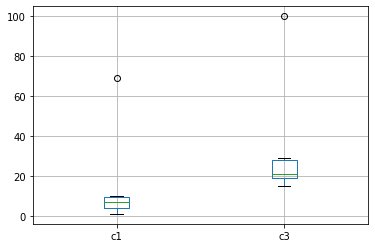

In [161]:
data.boxplot(figsize = (8 , 4))

In [162]:
data = pd.DataFrame({'c1': [3, 10, 5, 7, 1, 9, 69], 'c2': [450, 660, 510, 1000 , 499, 411, 580], 'c3': [20, 15, 18, 21, 120, 27, 29]}, columns=['c1', 'c2', 'c3'])
data

,c1,c2,c3
0,3,450,20
1,10,660,15
2,5,510,18
3,7,1000,21
4,1,499,120
5,9,411,27
6,69,580,29


<AxesSubplot:>

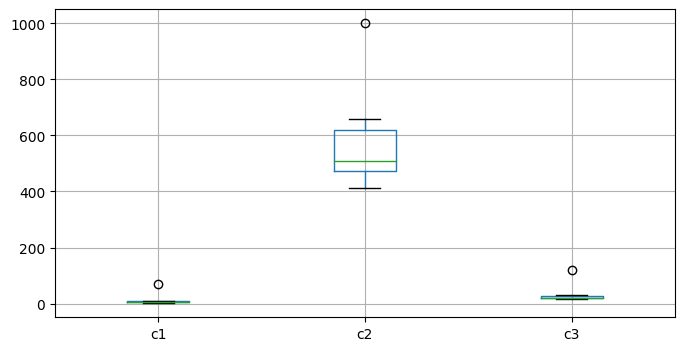

In [163]:
data.boxplot(figsize = (8 , 4))   # 三个列用同一个 y 轴，若列值之间差距过大，则图不好看，应该分开画

<AxesSubplot:>

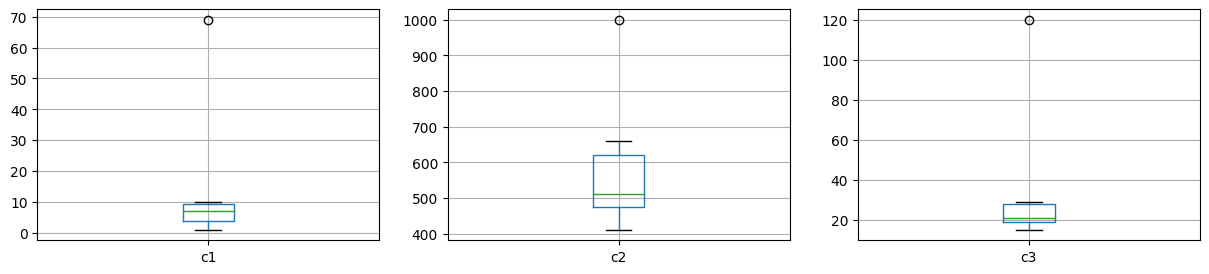

In [164]:
import matplotlib.pyplot as plt


# 1 行 3 列的画布
# 用 ax 指定子画布的编号
fig , axes = plt.subplots(1 , 3 , figsize=(15 , 3))


# 'Series' object has no attribute 'boxplot'
# 需要取一列为 DataFrame
data[['c1']].boxplot(ax = axes[0])
data[['c2']].boxplot(ax = axes[1])
data[['c3']].boxplot(ax = axes[2])

## 排序
>- ASCII 码值：数字 < 大写字母 < 小写字母

In [165]:
data = pd.DataFrame(np.arange(1 , 10).reshape(3 , 3) , index = [7 , 1 , 3] , columns = ['A' , 'B' , 'C'])
data

,A,B,C
7,1,2,3
1,4,5,6
3,7,8,9


In [166]:
# by = '指定排序列'
# ascending = False   降序
# ascending = Ture    升序（默认）

data = data.sort_values(by = 'B' , ascending = False)
data

,A,B,C
3,7,8,9
1,4,5,6
7,1,2,3


In [167]:
# 按行索引 index 排序

data = data.sort_index(ascending = True)
data

,A,B,C
1,4,5,6
3,7,8,9
7,1,2,3


## 重复行

### 所有列
>- 即整行重复

In [168]:
data = pd.DataFrame([range(i , i + 3) for i in [1 , 4 , 1 , 7 , 1 , 7]])
data.columns = ['A' , 'B' , 'C']
data

,A,B,C
0,1,2,3
1,4,5,6
2,1,2,3
3,7,8,9
4,1,2,3
5,7,8,9


In [169]:
# 检索重复行的行数

dataR_num = data.duplicated().sum()
dataR_num

3

In [170]:
# 检索重复行

dataR = data[data.duplicated()]
dataR

,A,B,C
2,1,2,3
4,1,2,3
5,7,8,9


In [171]:
# 删除重复行
# 需要重新赋值给 data ，否则不影响原 data

dataN = data.drop_duplicates()
dataN

,A,B,C
0,1,2,3
1,4,5,6
3,7,8,9


In [172]:
data

,A,B,C
0,1,2,3
1,4,5,6
2,1,2,3
3,7,8,9
4,1,2,3
5,7,8,9


### 指定列
>- 即列值重复

In [173]:
data = pd.DataFrame([[1 , 2 , 3] , [1 , 4 , 5] , [2 , 6 , 7] , [3 , 8 , 9] , [3 , 8 , 11]])
data.columns = ['A' , 'B' , 'C']
data.index = ['a' , 'b' , 'c' , 'd' , 'e']
data

,A,B,C
a,1,2,3
b,1,4,5
c,2,6,7
d,3,8,9
e,3,8,11


In [174]:
# 检索指定列的重复情况，True 表明重复

data.duplicated('A')

a    False
b     True
c    False
d    False
e     True
dtype: bool

In [175]:
# 检索重复列的行数

dataR_num = data.duplicated('A').sum()
dataR_num

2

In [176]:
# 检索重复列
# 指定多个列用 List ['A' , 'B']

dataR = data[data.duplicated('A')]
dataR

,A,B,C
b,1,4,5
e,3,8,11


In [177]:
# 删除重复列
# 需要重新赋值给 data ，否则不影响原 data

dataN = data.drop_duplicates('A')
dataN

,A,B,C
a,1,2,3
c,2,6,7
d,3,8,9


In [178]:
data

,A,B,C
a,1,2,3
b,1,4,5
c,2,6,7
d,3,8,9
e,3,8,11


## 缺失值
>- NaN == np.nan = not a number

In [179]:
data = pd.DataFrame([[np.nan , 2 , np.nan] , [4 , np.nan , 6] , [np.nan , 8 , np.nan]])
data.index = ['x' , 'y' , 'z']
data.columns = ['A' , 'B' , 'C']
data

,A,B,C
x,NaN,2.0,NaN
y,4.0,NaN,6.0
z,NaN,8.0,NaN


### 查看

In [180]:
data.isnull()

,A,B,C
x,True,False,True
y,False,True,False
z,True,False,True


In [181]:
data.notnull()

,A,B,C
x,False,True,False
y,True,False,True
z,False,True,False


In [182]:
# 每列 NaN 的个数

data.isnull().sum()

A    2
B    1
C    2
dtype: int64

In [183]:
# 每列非 NaN 的个数

data.notnull().sum()

A    1
B    2
C    1
dtype: int64

In [184]:
data['A'].isnull()          # 具体查看某一列

x     True
y    False
z     True
Name: A, dtype: bool

In [185]:
data['A'].isnull().sum()    # 具体查看某一列

2

In [186]:
data[data['B'].isnull()]         # 列 B 为 NaN 的那些行，即上述的筛选访问

,A,B,C
y,4.0,NaN,6.0


In [187]:
data[data['B'].notnull()]        # 列 B 非 NaN 的那些行，即上述的筛选访问

,A,B,C
x,NaN,2.0,NaN
z,NaN,8.0,NaN


### 处理

In [188]:
data = pd.DataFrame([[np.nan , 2 , np.nan] , [4 , np.nan , 6] , [33 , 33 , 33] , [np.nan , 8 , np.nan]])
data.index = ['x' , 'y' , 'z' , 'a']
data.columns = ['A' , 'B' , 'C']
data

,A,B,C
x,NaN,2.0,NaN
y,4.0,NaN,6.0
z,33.0,33.0,33.0
a,NaN,8.0,NaN


In [189]:
a = data.dropna()              # 只要一行中，有一列为 NaN ，则删除该行
a

,A,B,C
z,33.0,33.0,33.0


In [190]:
b = data.fillna(data.mean())   # 用每一列的均值填充该列的 NaN
b

,A,B,C
x,18.5,2.000000,19.5
y,4.0,14.333333,6.0
z,33.0,33.000000,33.0
a,18.5,8.000000,19.5
